Работа с данными (датасет ID_data_mass_18122012). Если Вы используете файл xlsx, то данные лежат на листе VU.

Цель - провести очистку набора данных и отобрать признаки.

In [88]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [89]:
# xls = pd.ExcelFile('ID_data_mass_18122012.xlsx')
# df1 = pd.read_excel(xls, 'VU')
# print(df1)
# df1.to_csv("dataset.csv", index=False, encoding="utf-8")
# df1.head()

удалил тут все что не нужно в датасете, первую строку и третью строки

In [90]:
df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,Unnamed: 1,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,...,Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ.1
0,804,2008-06-05 00:00:00,3576.3,7.94,249.6,370.1,101.8,249.0,359.6,101.8,...,-,93.6,92.376018,0.806017,801.0,1000.0,0.669449,2.782623,311.9094,NaN
1,804,2008-06-06 00:00:00,3576.3,9.53,233.5,364.6,101.3,231.0,338.1,102.4,...,-,92.9,91.685171,0.806017,801.0,1000.0,0.669449,3.697781,288.6003,NaN
2,804,2008-06-07 00:00:00,3576.3,11.11,213.4,357.1,101.6,211.0,314.8,100.6,...,-,91.4,90.204787,0.806017,801.0,1000.0,0.669449,4.515073,248.7906,NaN
3,804,2008-06-08 00:00:00,3576.3,12.70,191.6,347.4,98.4,187.0,291.5,99,...,-,89.2,88.033555,0.806017,801.0,1000.0,0.669449,5.217673,223.5591,NaN
4,804,2008-06-09 00:00:00,3576.3,14.29,171.9,337.69999999999993,99.2,169.0,270.3,99.5,...,-,89.7,88.527017,0.806017,801.0,1000.0,0.669449,5.765092,215.1486,NaN


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      185 non-null    int64  
 1   Unnamed: 1                      185 non-null    object 
 2   Глубина манометра               185 non-null    object 
 3   Dшт                             185 non-null    float64
 4   Руст                            185 non-null    float64
 5   Рзаб                            185 non-null    object 
 6   Pлин                            185 non-null    object 
 7   Руст.1                          185 non-null    float64
 8   Рзаб.1                          185 non-null    object 
 9   Рлин                            185 non-null    object 
 10  Туст                            185 non-null    float64
 11  Тна шлейфе                      179 non-null    object 
 12  Тзаб                            185 

timestamp и номер явно не нужны

In [92]:
df1 = df.drop(columns=['Unnamed: 0', 'Unnamed: 1'])


In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               185 non-null    object 
 1   Dшт                             185 non-null    float64
 2   Руст                            185 non-null    float64
 3   Рзаб                            185 non-null    object 
 4   Pлин                            185 non-null    object 
 5   Руст.1                          185 non-null    float64
 6   Рзаб.1                          185 non-null    object 
 7   Рлин                            185 non-null    object 
 8   Туст                            185 non-null    float64
 9   Тна шлейфе                      179 non-null    object 
 10  Тзаб                            185 non-null    object 
 11  Tлин                            185 non-null    object 
 12  Дебит газа                      185 

Целевые переменные G_total и КГФ

Удалить строки, где обе целевых переменные пустые

In [94]:
targets = ['G_total', 'КГФ', 'КГФ.1']
df_with_clear_targets = df1.dropna(subset=targets, how='all')

Пропуски заполнить NaN // но ведь пустые и так наны, зочем?

In [95]:
df_with_clear_targets.replace(to_replace='-', value=np.nan, inplace=True)
df_with_clear_targets.replace(to_replace='не спускался', value=np.nan, inplace=True)
print(df_with_clear_targets.info())

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 0 to 167
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               90 non-null     object 
 1   Dшт                             93 non-null     float64
 2   Руст                            93 non-null     float64
 3   Рзаб                            90 non-null     object 
 4   Pлин                            93 non-null     object 
 5   Руст.1                          93 non-null     float64
 6   Рзаб.1                          90 non-null     object 
 7   Рлин                            93 non-null     object 
 8   Туст                            93 non-null     float64
 9   Тна шлейфе                      60 non-null     object 
 10  Тзаб                            90 non-null     object 
 11  Tлин                            93 non-null     object 
 12  Дебит газа                      93 non-nul

/var/folders/gx/6twqwc0556l7b9zwsrx0h_1r0000gn/T/ipykernel_27960/337145974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_clear_targets.replace(to_replace='-', value=np.nan, inplace=True)
/var/folders/gx/6twqwc0556l7b9zwsrx0h_1r0000gn/T/ipykernel_27960/337145974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_clear_targets.replace(to_replace='не спускался', value=np.nan, inplace=True)


In [96]:
df_with_clear_targets = df_with_clear_targets.apply(pd.to_numeric, errors='coerce')
print(df_with_clear_targets.info())

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 0 to 167
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               90 non-null     float64
 1   Dшт                             93 non-null     float64
 2   Руст                            93 non-null     float64
 3   Рзаб                            90 non-null     float64
 4   Pлин                            93 non-null     float64
 5   Руст.1                          93 non-null     float64
 6   Рзаб.1                          90 non-null     float64
 7   Рлин                            93 non-null     float64
 8   Туст                            93 non-null     float64
 9   Тна шлейфе                      60 non-null     float64
 10  Тзаб                            90 non-null     float64
 11  Tлин                            93 non-null     float64
 12  Дебит газа                      93 non-nul

Сохранить названия признаков

Построить гистраграмму важности признаков по критерию gain_ratio (нормированный прирост информации)

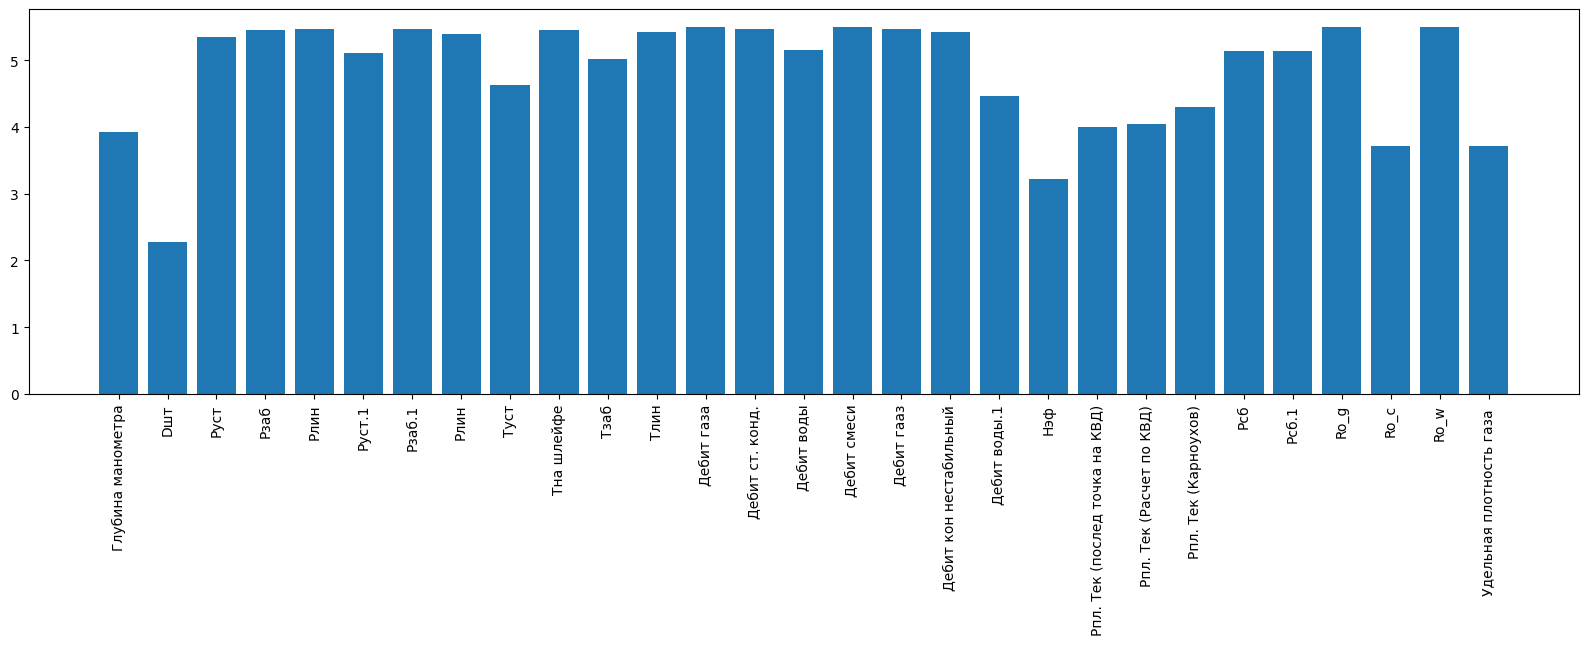

In [97]:
def entropy(feature: pd.DataFrame):
    probs = feature.value_counts(normalize=True)
    return -1 * np.sum(np.log2(probs) * probs)


def information_gain(df: pd.DataFrame, feature: str, target: str):
    entropy_list = []
    weight_list = []

    target_entropy = entropy(df[target])

    for level in df[feature].unique():
        feature_level = df[df[feature] == level]
        entropy_list.append(entropy(feature_level[target]))
        weight_list.append(len(feature_level) / len(df))

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    return target_entropy - feature_remaining_impurity

def draw_gain(df: pd.DataFrame, num_targets:int):
    gain_ratio = []
    for column in df.columns[:-num_targets]:
        gain_ratio.append(information_gain(df, column, df.columns[-1]))

    label_names = df.columns[:-num_targets]
    x = np.arange(len(label_names))

    plt.figure(figsize=(20, 5))
    plt.bar(x, gain_ratio)
    plt.xticks(x, label_names, rotation=90)
    plt.show()

draw_gain(df_with_clear_targets, 3)


Построить тепловую карту признаков (матрица корреляций всех признаков со всеми, в том числе целевыми переменными), для удобства коэффициент корреляции берите по модулю


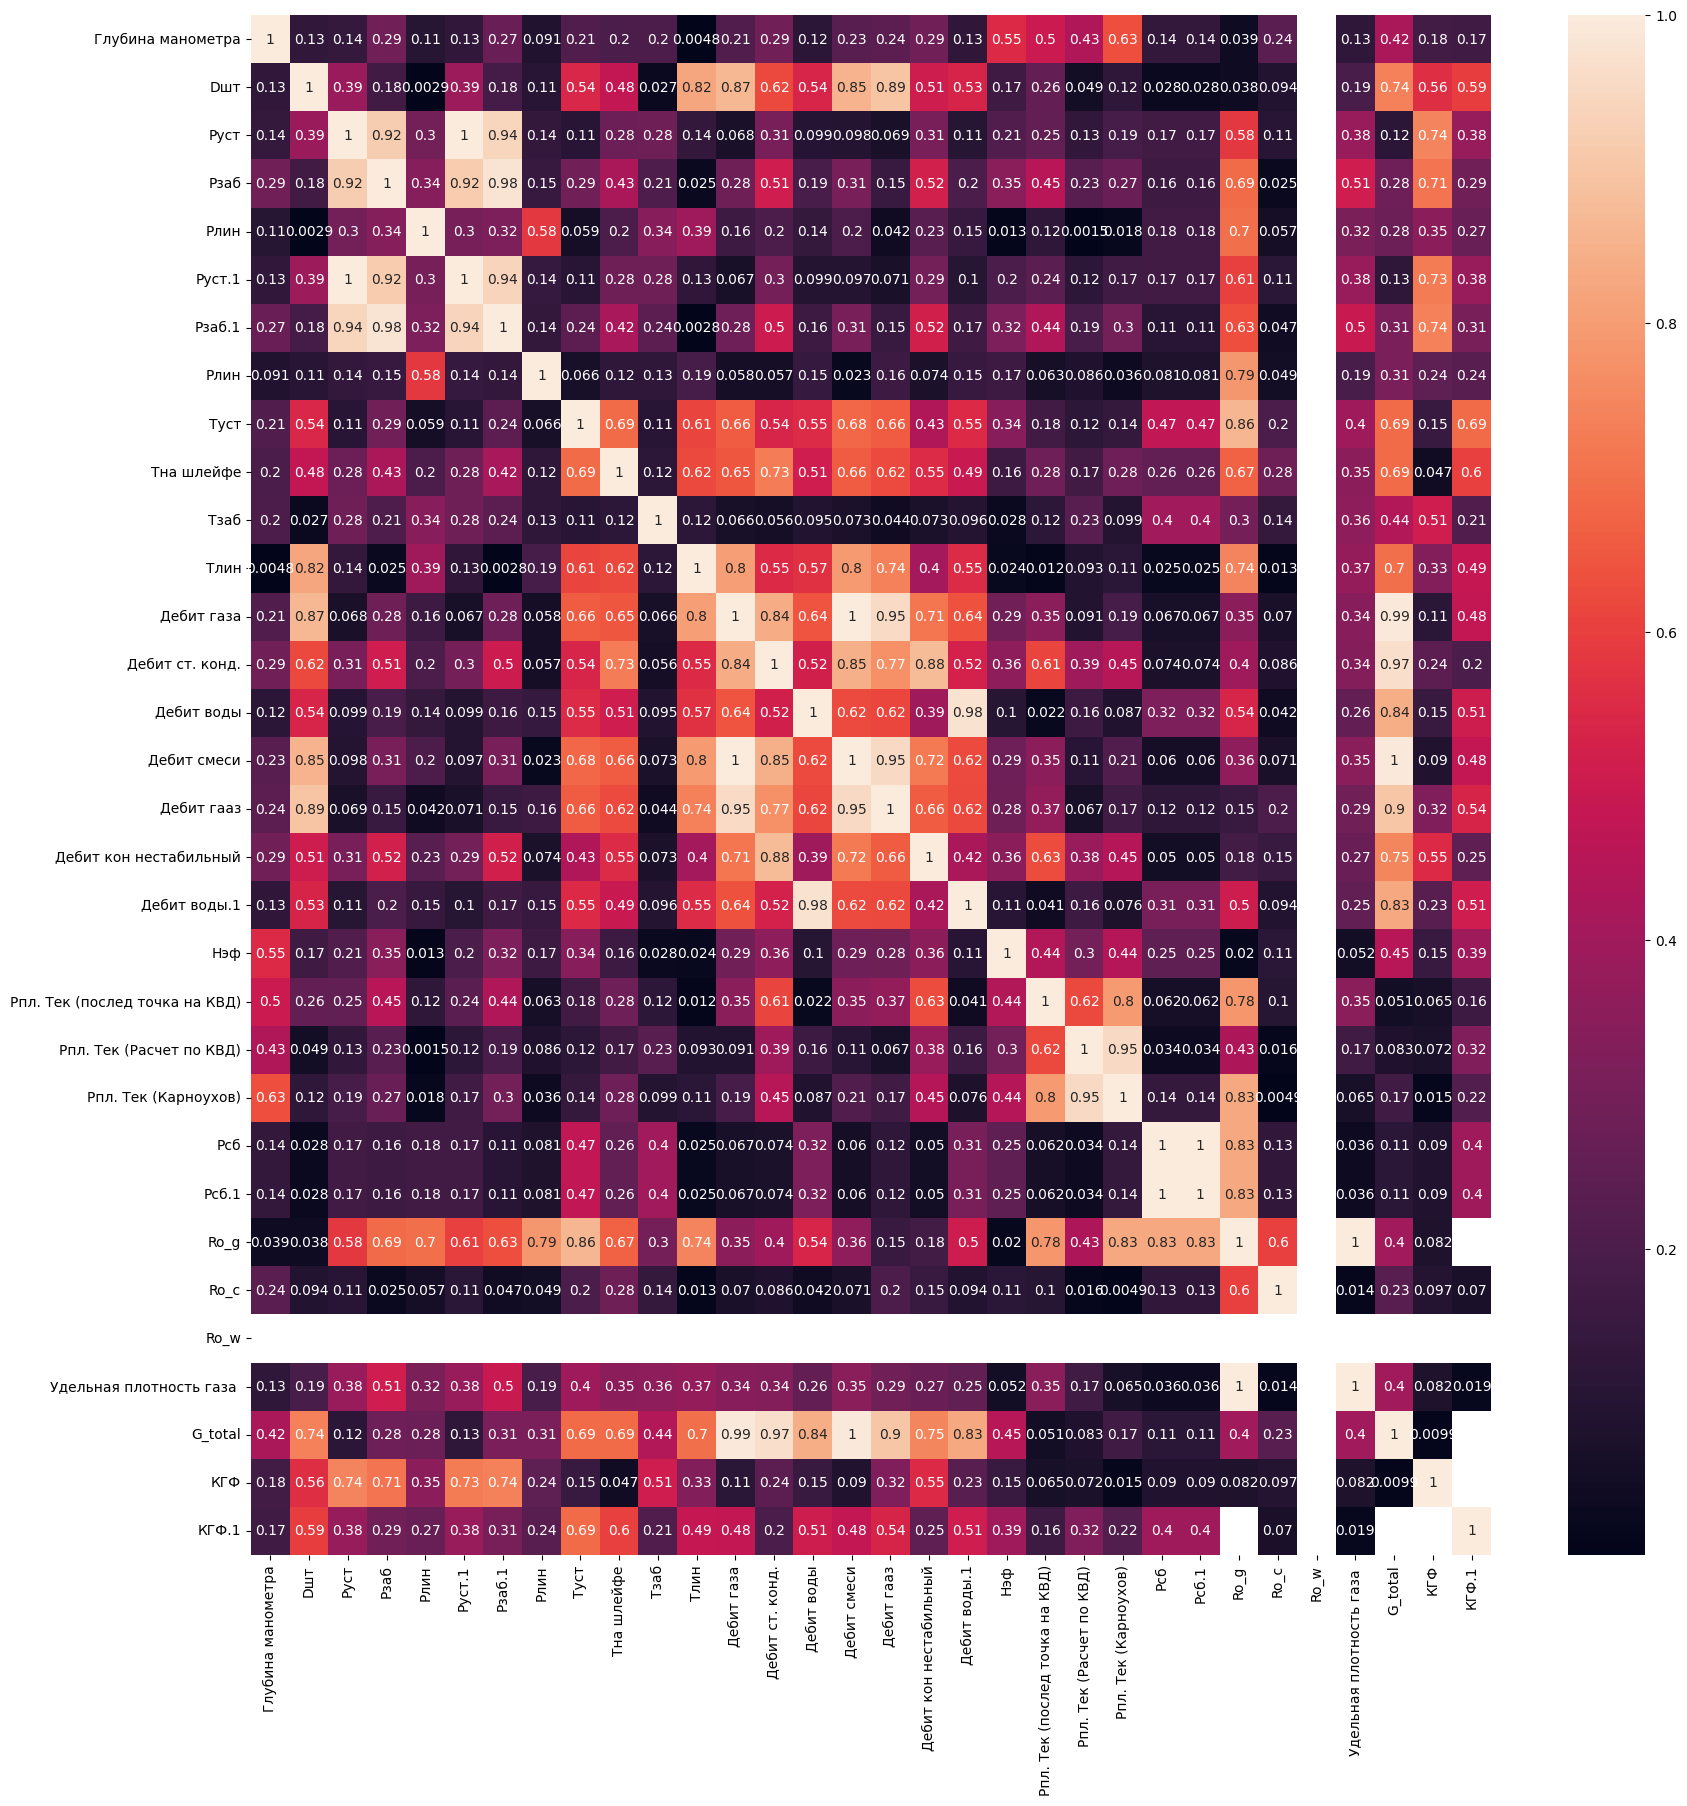

In [98]:
figure, axis = plt.subplots(figsize=(20, 20))
sns.heatmap(df_with_clear_targets.corr().abs(), annot=True, ax=axis)
plt.show()


Для каждого признака построить график распределения с отложенными на нем линиями первого и третьего квартилей


In [99]:
df_with_clear_targets.shape[1]-3 

29

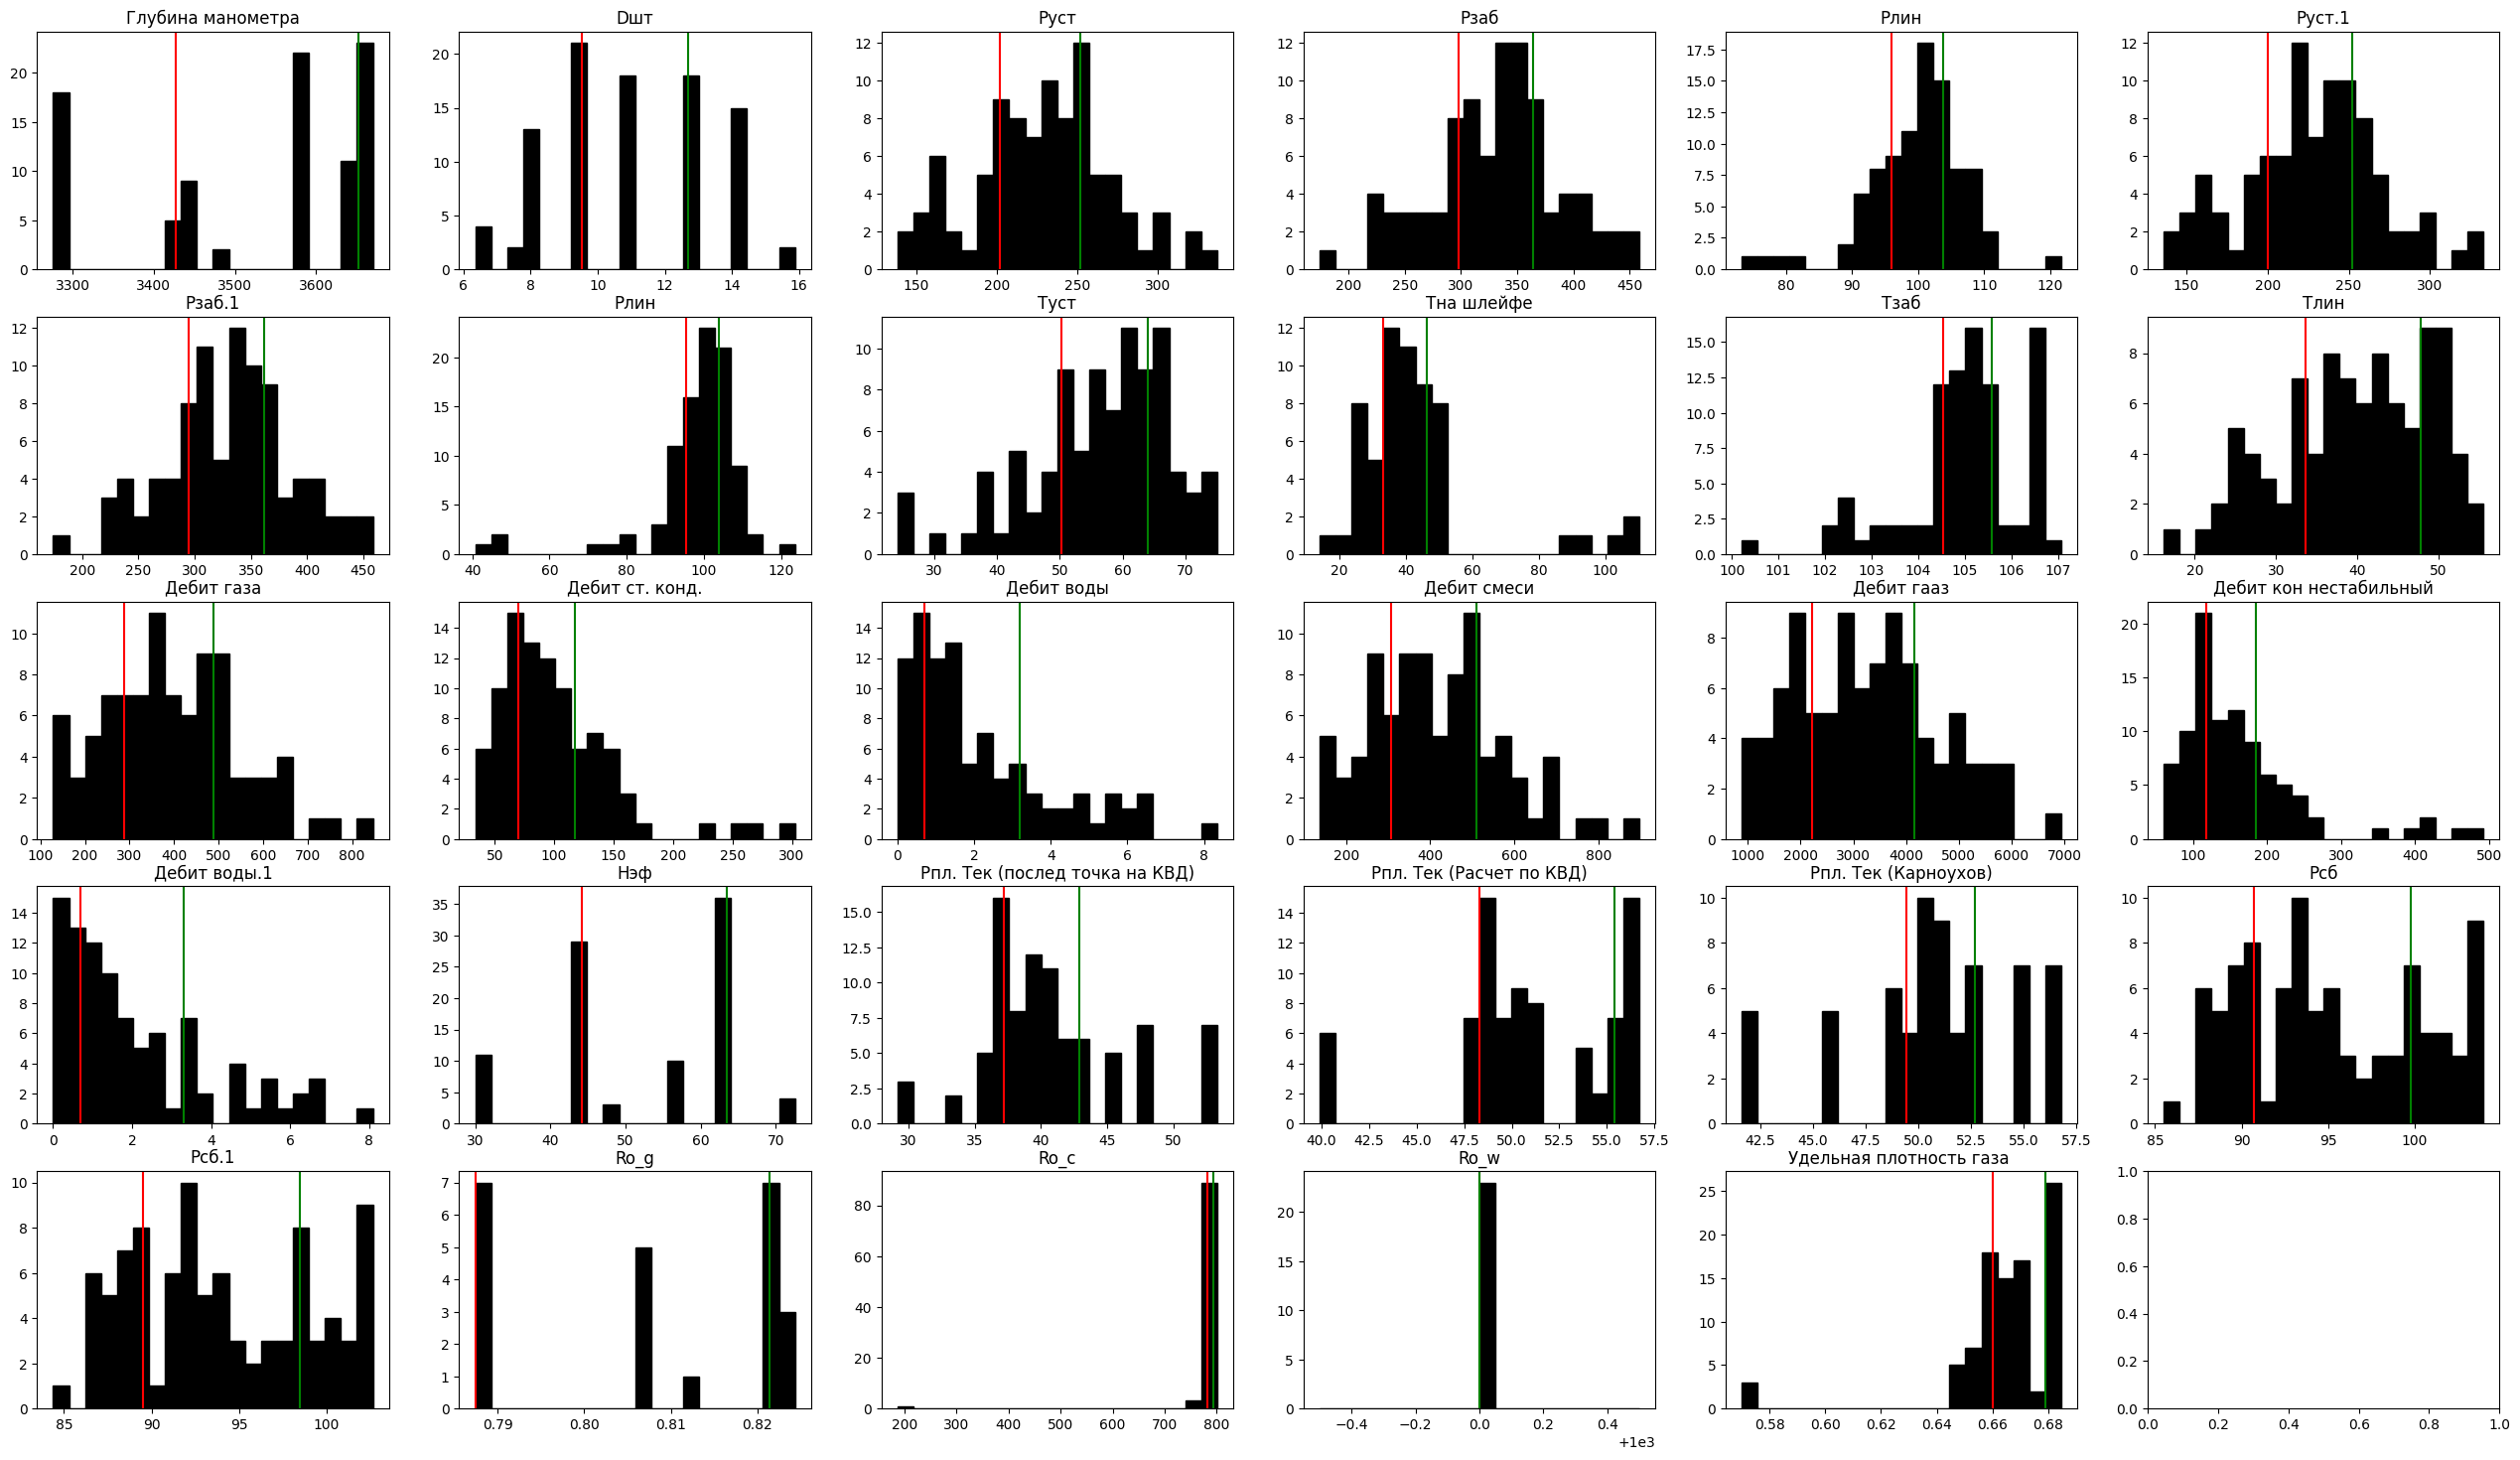

In [100]:
def draw(ax, feature, title=""):
    # print(feature)
    ax.hist(feature, cumulative=False, color='black', bins=20, edgecolor='black', linewidth=1)
    ax.set_title(title)
    desc = feature.describe()
    ax.axvline(desc['25%'], color='red')
    ax.axvline(desc['75%'], color='green')


cols = 6
_, axs = plt.subplots(figsize=(32, 18), ncols=cols, nrows=df_with_clear_targets.shape[1] // cols)

for i, col in enumerate(df_with_clear_targets.columns[:-3]):
    c_i, r_i = int(i // cols), int(i % cols)
    draw(axs[c_i][r_i], df_with_clear_targets[col], title=col)
plt.show()


Для каждого признака посчитать элементы описательной статистики


In [101]:
statistics = ['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль', 'Среднее значение', 'Медиана',
              'Третий квартиль', 'Максимум', 'Стандартное отклонение', 'Мощность', 'Интерквартильный размах']

In [102]:
rows_count = df_with_clear_targets.shape[0]
describes = df_with_clear_targets.describe()

quantity = describes.loc['count'].values
percentageSkips = [100 - q / rows_count * 100 for q in quantity]
minimum = describes.loc['min'].values
first_quartile = describes.loc['25%'].values
mean = describes.loc['mean'].values
median = describes.loc['50%'].values
third_quartile = describes.loc['75%'].values
maximum = describes.loc['max'].values
std = describes.loc['std'].values
power = df_with_clear_targets.nunique().values
inter_quartile_range = [q75 - q25 for q75, q25 in zip(third_quartile, first_quartile)]

In [103]:
table = pd.DataFrame(
    [quantity, percentageSkips, minimum, first_quartile, mean, median, third_quartile, maximum, std, power,
     inter_quartile_range], columns=df_with_clear_targets.columns, index=statistics)

table

,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,...,Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ.1
Количество,90.000000,93.000000,93.000000,90.000000,93.000000,93.000000,90.000000,93.000000,93.000000,60.000000,...,64.000000,93.000000,93.000000,23.000000,93.000000,23.000000,93.000000,23.000000,23.000000,70.000000
Процент пропусков,3.225806,0.000000,0.000000,3.225806,0.000000,0.000000,3.225806,0.000000,0.000000,35.483871,...,31.182796,0.000000,0.000000,75.268817,0.000000,75.268817,0.000000,75.268817,75.268817,24.731183
Минимум,3276.000000,6.350000,138.157895,174.000000,73.306638,136.000000,174.000000,40.739839,24.200000,14.000000,...,41.600000,85.500000,84.381939,0.787416,186.000000,1000.000000,0.570000,2.782623,199.627612,0.131000
Первый квартиль,3427.625000,9.530000,201.636750,297.797500,95.945951,200.000000,294.625000,95.335032,50.300000,33.300000,...,49.425000,90.700000,89.513940,0.787416,782.000000,1000.000000,0.660000,4.381813,237.545619,0.157000
Среднее значение,3524.086667,10.951183,228.293412,331.762255,99.860962,227.644269,330.334444,98.005453,56.172043,43.091667,...,50.773438,95.162366,93.917953,0.807631,780.847527,1000.000000,0.665260,5.742359,265.028478,0.180900
Медиана,3579.000000,11.110000,229.894737,337.789172,100.800000,228.000000,334.250000,100.260000,58.000000,38.700000,...,50.900000,94.200000,92.968172,0.806017,787.000000,1000.000000,0.667000,5.250915,255.681127,0.179000
Третий квартиль,3652.250000,12.700000,252.000000,364.150000,103.865199,252.000000,362.150000,104.000000,64.000000,46.375000,...,52.700000,99.800000,98.494942,0.821344,793.700000,1000.000000,0.679000,6.125723,288.891902,0.200000
Максимум,3670.000000,15.880000,337.108108,458.600000,121.682930,333.000000,458.500000,123.616800,75.000000,110.200000,...,56.800000,104.000000,102.640020,0.824330,801.000000,1000.000000,0.684660,10.931155,385.415949,0.270000
Стандартное отклонение,144.474862,2.423172,41.897238,56.481235,7.300663,41.757127,56.357493,12.425851,11.250781,19.602337,...,4.006591,5.136060,5.068897,0.015076,62.795111,0.000000,0.020485,2.112717,40.997125,0.030380
Мощность,20.000000,10.000000,87.000000,88.000000,91.000000,73.000000,89.000000,88.000000,51.000000,57.000000,...,13.000000,70.000000,70.000000,6.000000,25.000000,1.000000,21.000000,23.000000,23.000000,49.000000


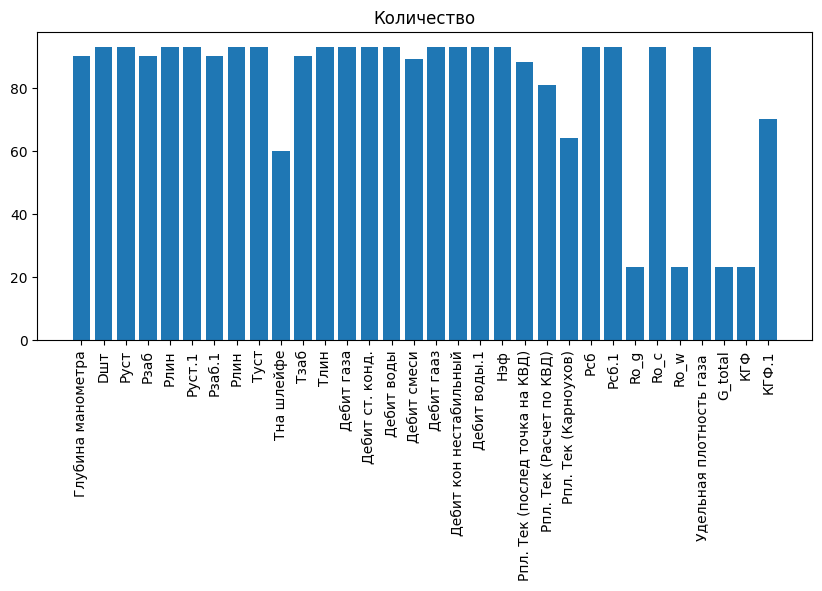

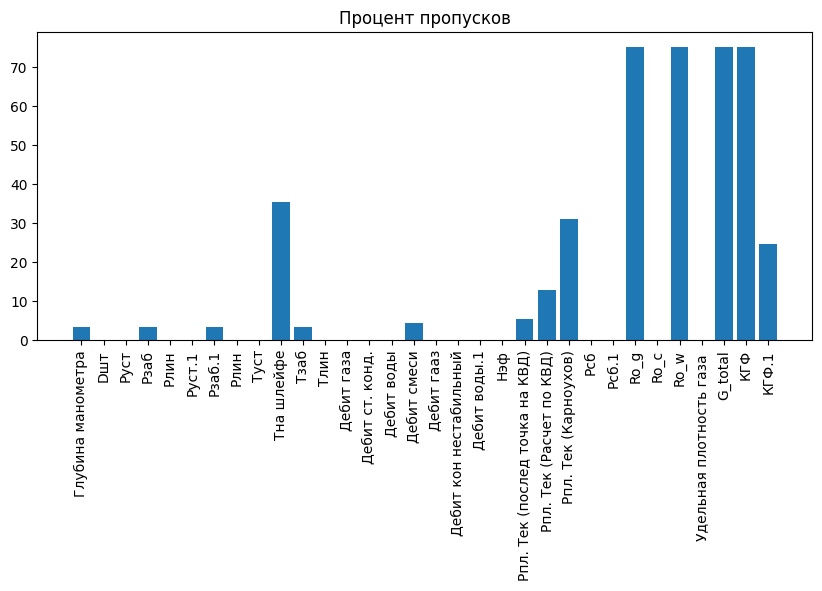

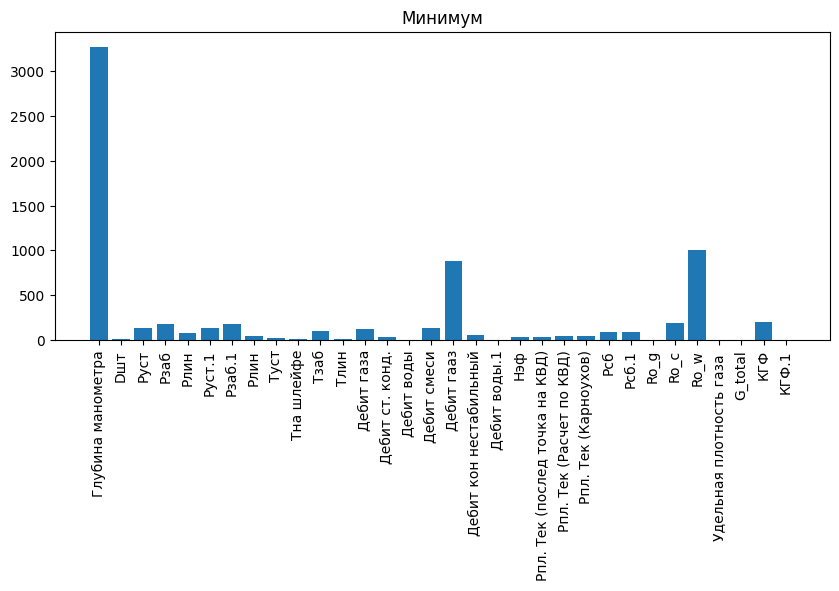

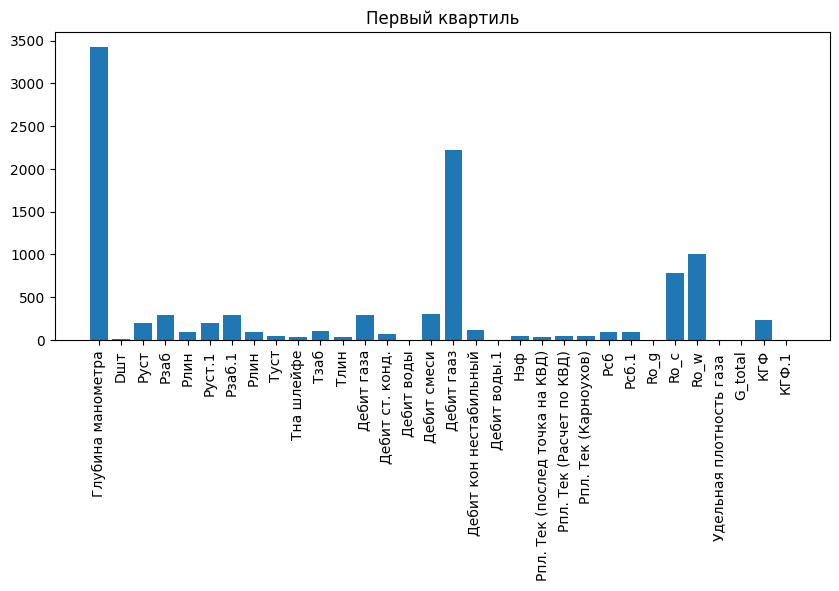

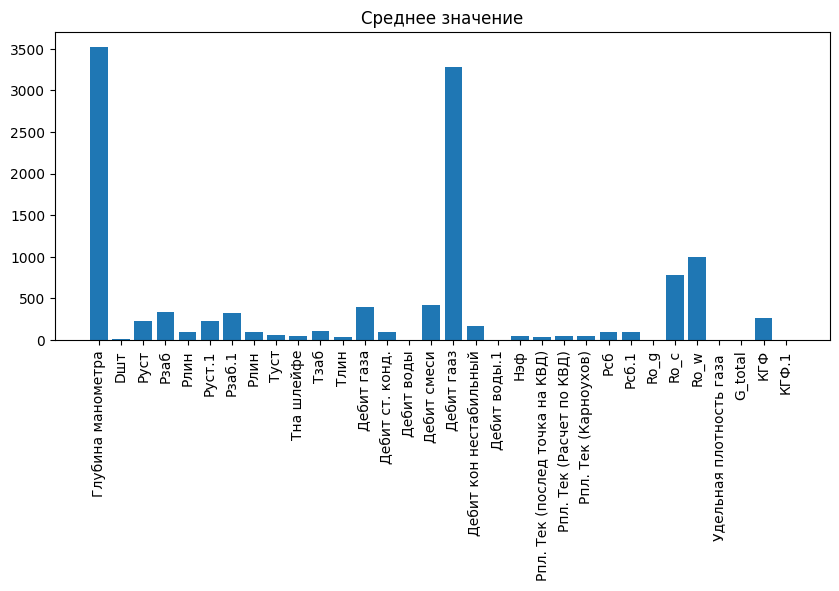

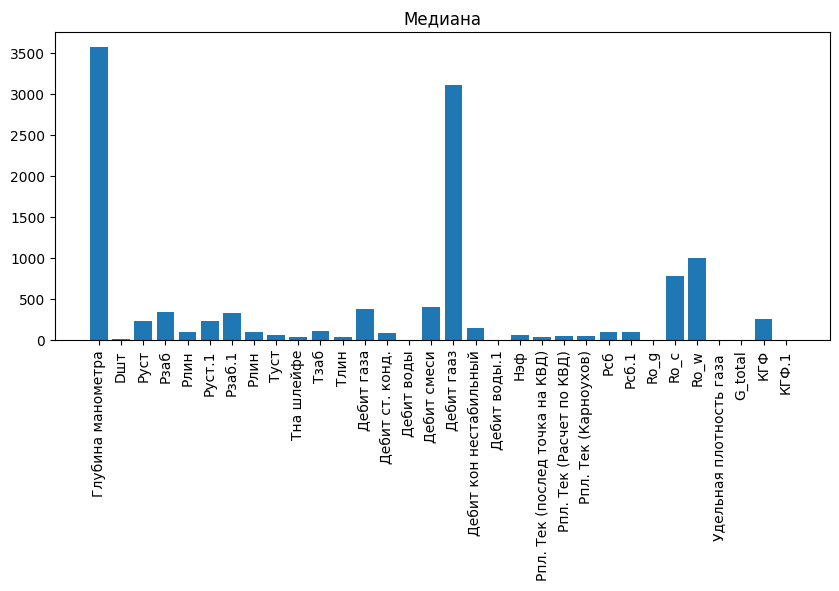

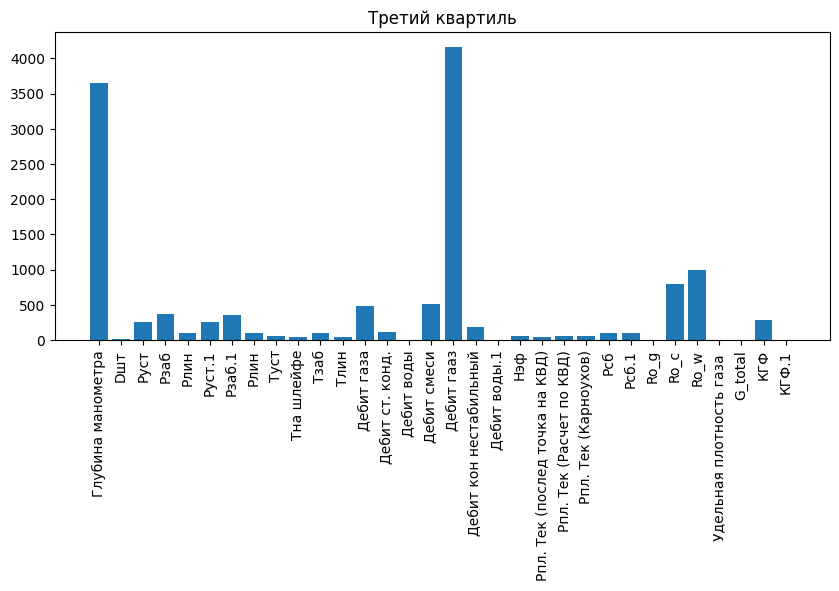

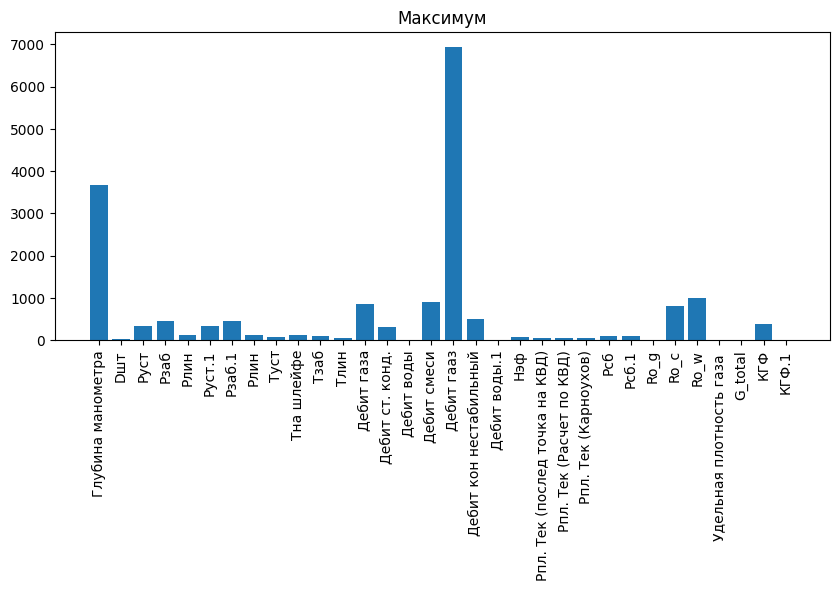

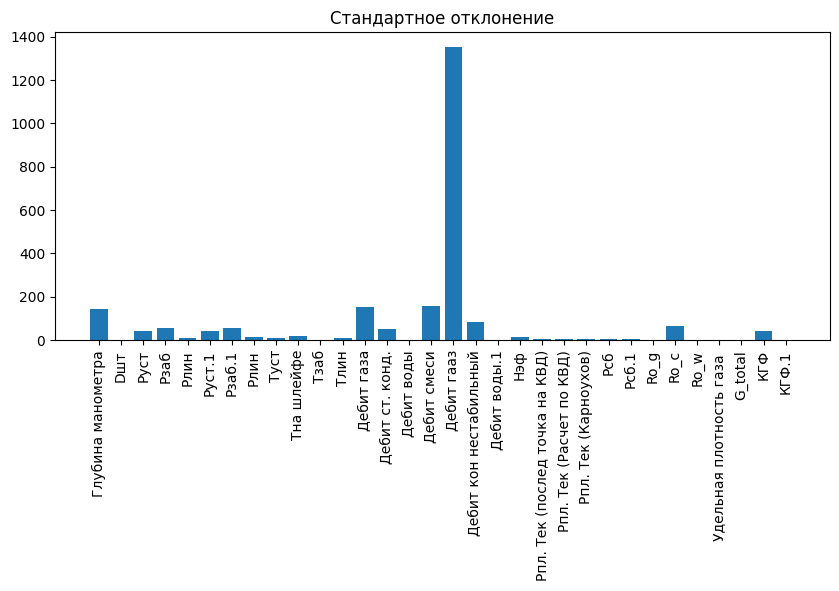

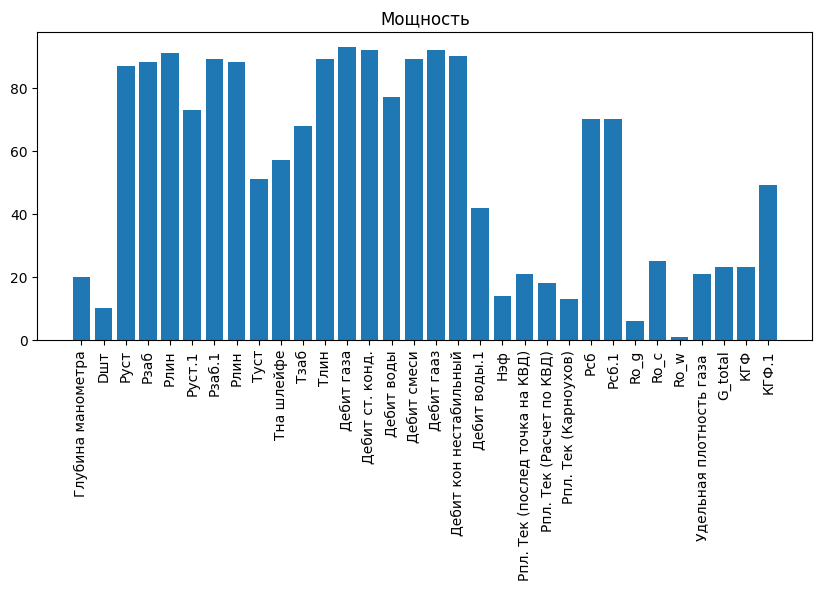

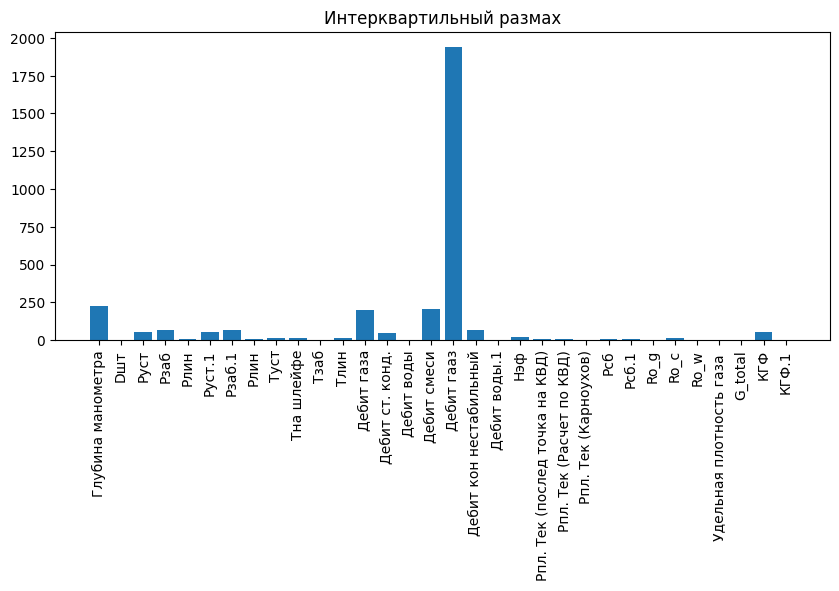

In [104]:
for i, stat in enumerate(
        [quantity, percentageSkips, minimum, first_quartile, mean, median, third_quartile, maximum, std, power,
         inter_quartile_range]):
    label_names = df_with_clear_targets.columns
    x = np.arange(len(label_names))
    plt.figure(figsize=(10, 4))
    plt.bar(x, stat)
    plt.title(statistics[i])
    plt.xticks(x, label_names, rotation=90)
    plt.show()


На основании всего этого и рекомендаций по работе с признаками из лекции составить список удаляемых и оставляемых признаков с обоснованием почему Вы это сделали.

на основании матрицы корреляции можно сделать следующие выводы (не смотря на главную диагональ, офк)
 - Рсб и Рсб.1 дублируют друг друга, одну из них необходимо удалить. такая же ситуация с Руст и Рзаб. справедливости ради, также есть Дебит воды, с корреляцией 0.98, можно списать на погрешность и тожже в целом удалить.
 - `df_with_clear_targets['Ro_w'].unique() = array([1000.,   nan])`, что тоже не несет особой смысловой нагрузки, удалить
 - G_total (одна из целевых переменных) сверхкоррелирует с Дебит смеси, Дебит газа и Дебит ст. конд - удалить

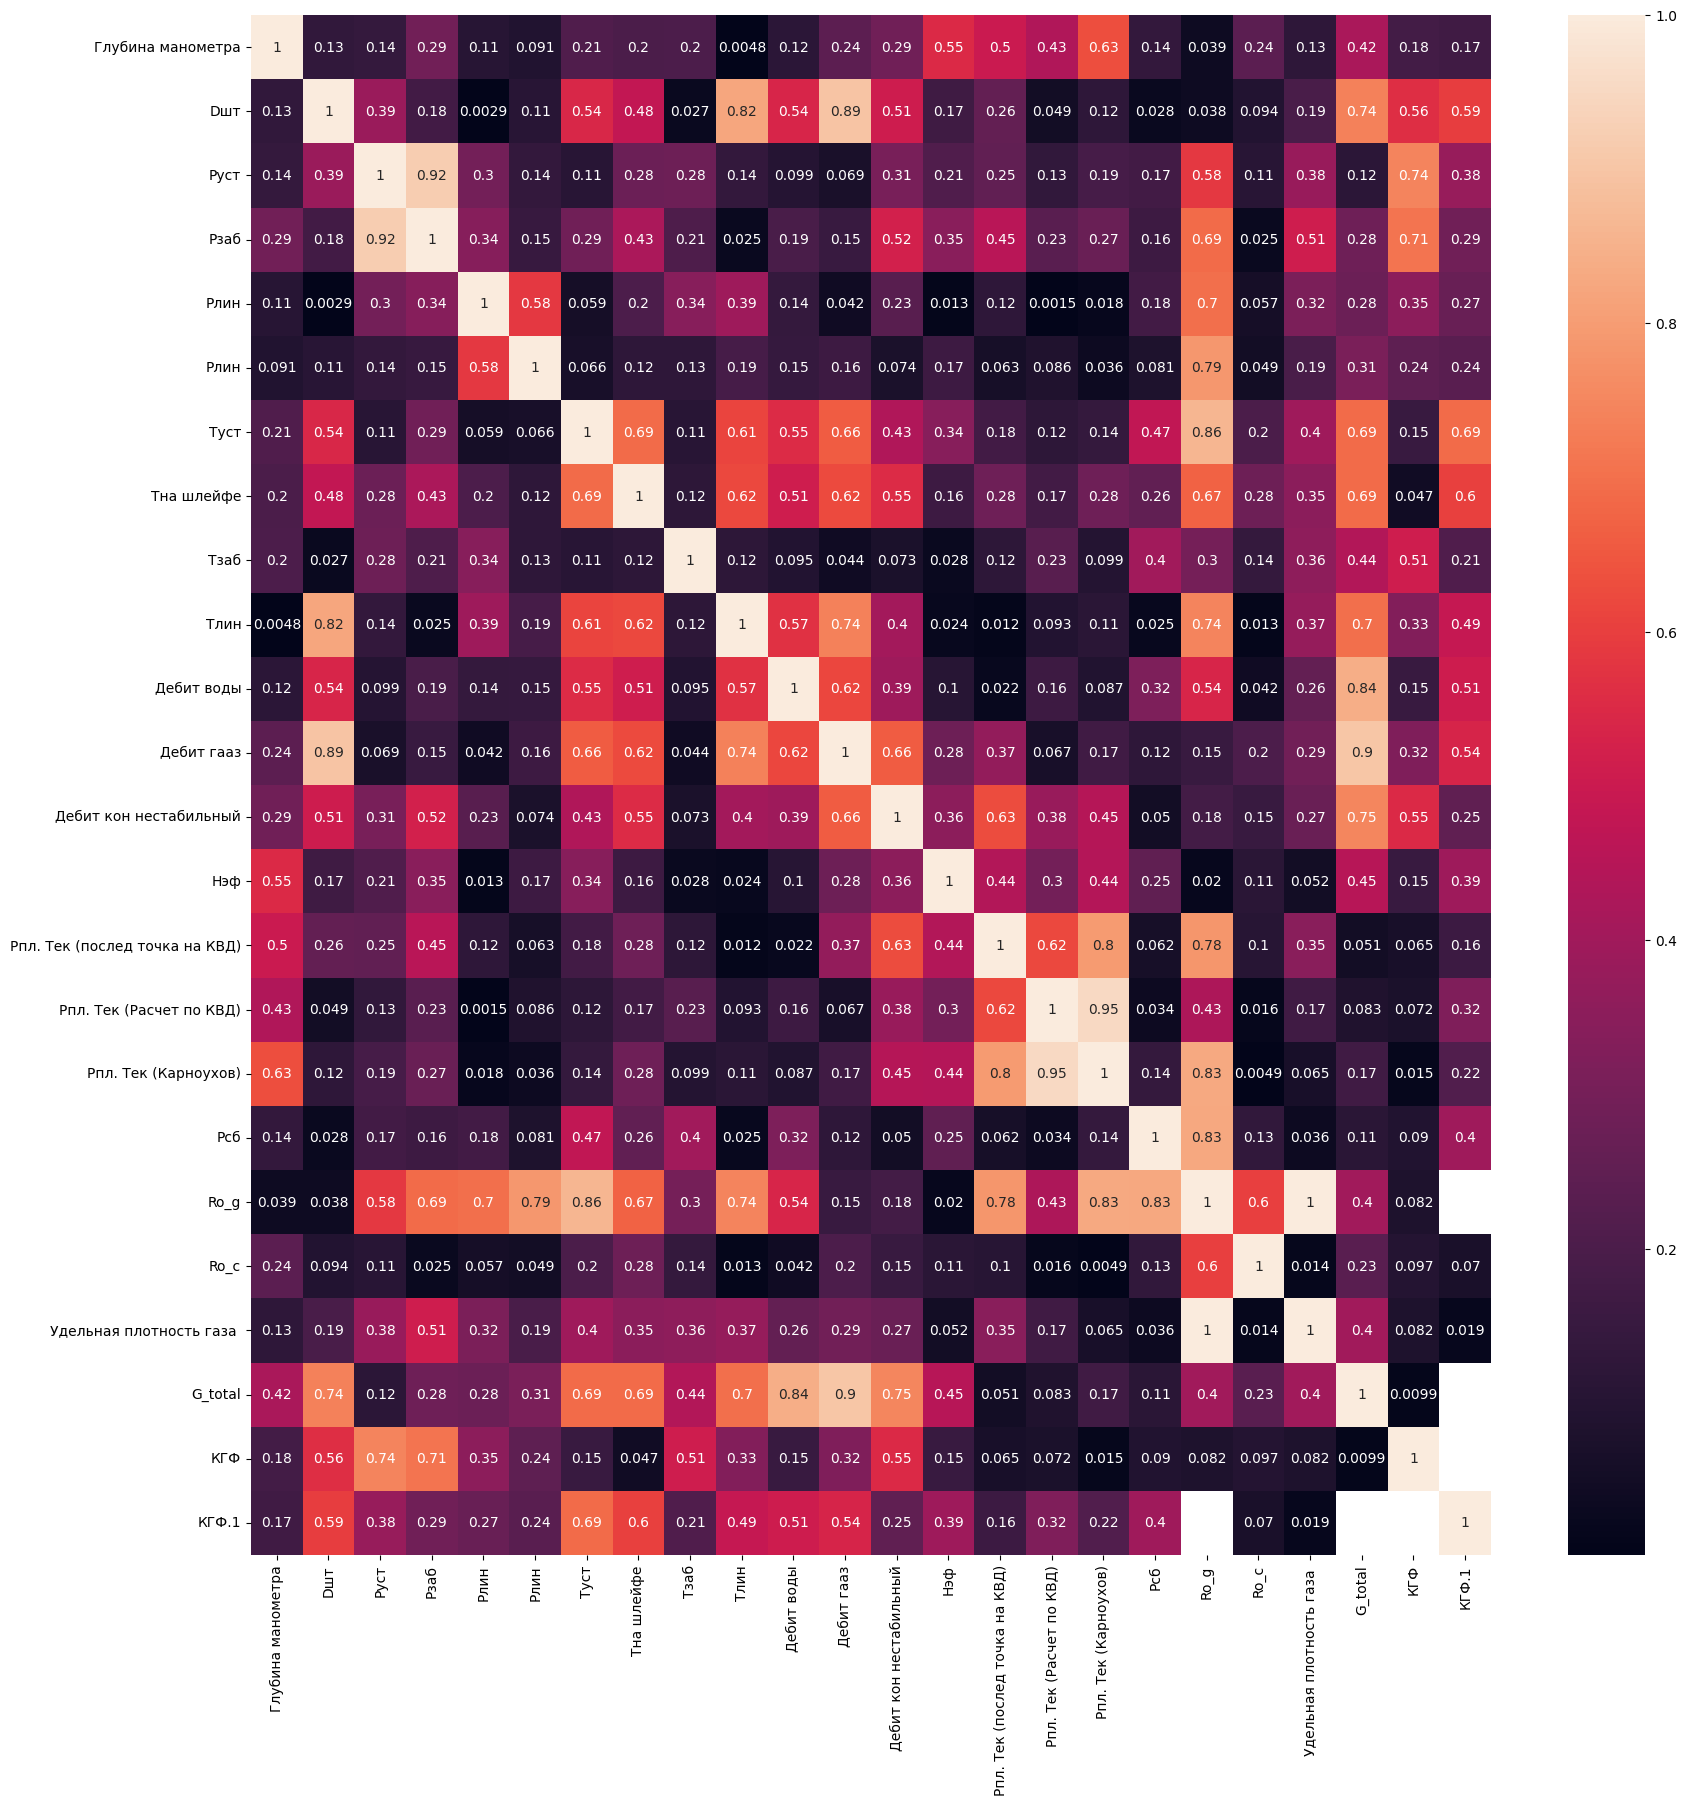

In [105]:
bad_columns_by_corr=['Ro_w', 'Pсб.1', 'Дебит смеси', 'Руст.1', 'Рзаб.1', 'Дебит воды.1', 'Дебит смеси', 'Дебит ст. конд.', 'Дебит газа']
cleared_df_by_corr = df_with_clear_targets.drop(columns=bad_columns_by_corr)
figure, axis = plt.subplots(figsize=(20, 20))
sns.heatmap(cleared_df_by_corr.corr().abs(), annot=True, ax=axis)
plt.show()

никогда не оценивал по gain_ratio, но предполагаю, что все, что с низким приростом информации надо шмякнуть. Низкий прирост понятие эмпирическое, если поглядеть на график, самый низкий прирост у Dшт и Hэф. Уберу их, но это чисто эмпирически

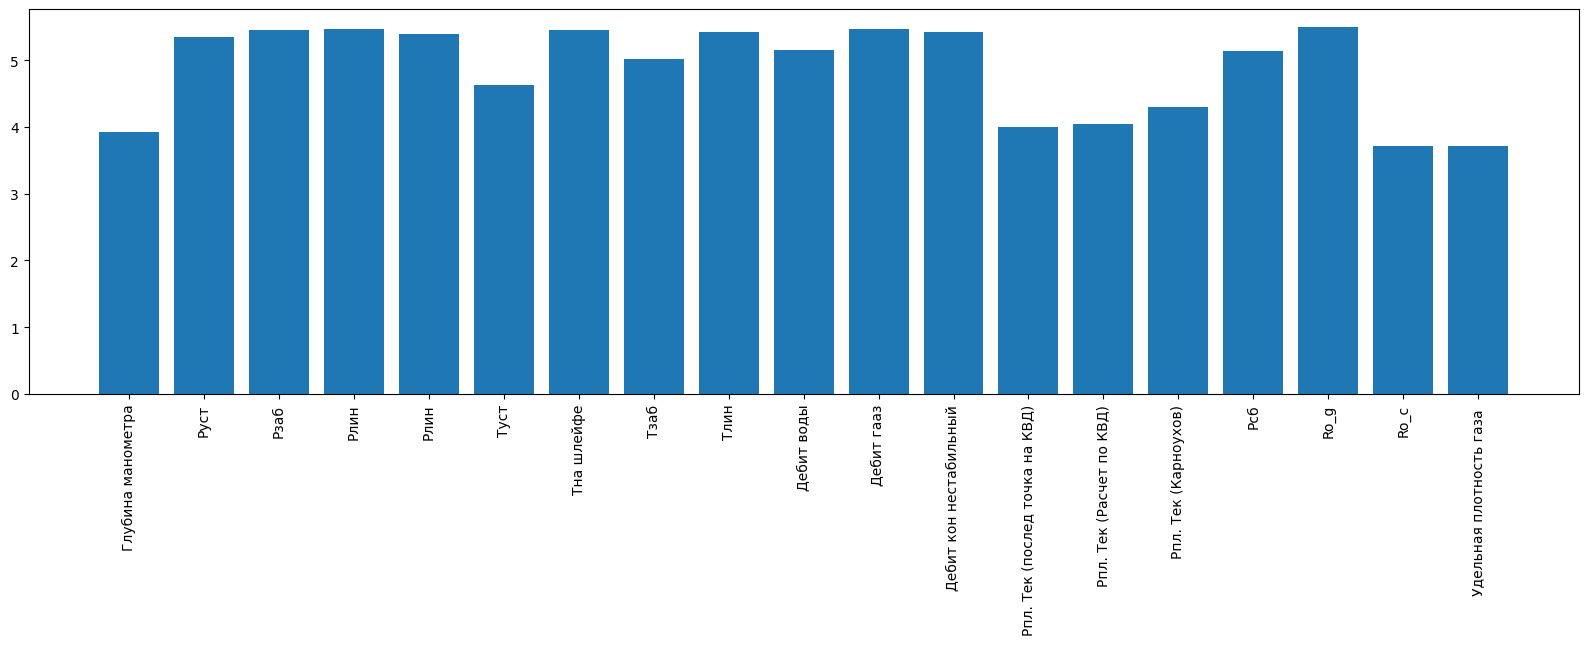

In [107]:
bad_columns_by_gain = ['Dшт', 'Нэф']
cleared_df_by_gain = cleared_df_by_corr.drop(columns=bad_columns_by_gain)
draw_gain(cleared_df_by_gain, 3)